<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW4/problem2_python_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 11/3/23

> Project 4


## Description


> In this notebook I will analyze a dataset on nutrition in Python. This includes sorting the data to get a bigger picture, as well as analyzing outliers. Some math is also used to compare columns to each other to get a better picture of the dataset and further explain it.



## 1. Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csvLinks

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Pandas read_csv from url
url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv"

nutrition_subset = pd.read_csv(url, sep=",")

## 2. The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.

In [43]:
# display the entire data frame
print(nutrition_subset)

#Summarize and describe the data set to visualize some of its properties
nutrition_subset.describe()

                                  food item  weight_in_grams  saturated_fat  \
0    GELATIN; DRY                  1 ENVELP             7.00            0.0   
1    SEAWEED; SPIRULINA; DRIED     1 OZ                28.35            0.8   
2    YEAST; BAKERS; DRY; ACTIVE    1 PKG                7.00            0.0   
3    PARMESAN CHEESE; GRATED       1 OZ                28.35            5.4   
4    PARMESAN CHEESE; GRATED       1 CUP              100.00           19.1   
..                                      ...              ...            ...   
956  COFFEE; BREWED                6 FL OZ            180.00            0.0   
957  TEA; BREWED                   8 FL OZ            240.00            0.0   
958  TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ            241.00            0.0   
959  LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF              15.00            0.0   
960  SALT                          1 TSP                5.50            0.0   

     cholesterol  
0              0  
1            

,weight_in_grams,saturated_fat,cholesterol
count,961.000000,961.000000,961.00000
mean,149.409365,3.987617,32.55359
std,175.909357,10.744359,119.96059
min,0.400000,0.000000,0.00000
25%,32.000000,0.000000,0.00000
50%,113.000000,0.400000,0.00000
75%,218.000000,3.300000,20.00000
max,1542.000000,119.900000,2053.00000


As you can see in the data set, there are quite a few 0 values in the saturated fat and cholesterol columns. In some data sets, many 0 values may seem like an error, but for this data on nutrition, it is possible for certain types of food or beverages to hve 0 grams of saturated fat or cholesterol.

## 3. Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [44]:
#Sort the data set in descending order so the 5 highest saturated fat items are visible
nutrition_subset.sort_values(by = 'saturated_fat', ascending = False, inplace = True)

#I displayed the top 10 of the sorted data because Python displays it weird by default
nutrition_subset.head(10)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195
466,ICE CREAM; VANLLA; REGULR 11% 1/2 GALN,1064.0,71.3,476
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,66.0,1183
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.0,55.6,598


As you can see from the sorted data set above, the top 5 saturated fat food items are displayed. If you take a look at the described data set above (from #2), the third quartile weight is 218 and the max weight is 1542. The top 4 saturated fat food items fall above the third quartile, but the cup of lard ways much less than the top 4 items. This shows that the validity of analyzing foods of different sizes can be flawed. The lard has a much higher saturated fat content for its weight and would easily move its way up the ranks if there was a larger portion of it. Many of the items on the list are ranked high because of their portion sizes when the ratios between weight and fat are higher on other smaller items. For example, some items, like the carrot cake (which is one of the highest weights), have a much smaller ratio between fat and weight.


## 4. Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [45]:
#Create a new column that measures saturated fat per gram
nutrition_subset['saturated_fat_per_gram'] = nutrition_subset['saturated_fat'] / nutrition_subset['weight_in_grams']

#Re-sort the data set by the new variable
nutrition_subset.sort_values(by = 'saturated_fat_per_gram', ascending = False, inplace = True)

#I displayed the top 10 of the sorted data because Python displays it weird by default
nutrition_subset.head(10)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.00,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.00,7.1,31,0.507143
709,BUTTER; SALTED 1/2 CUP,113.00,57.1,247,0.505310
710,BUTTER; UNSALTED 1/2 CUP,113.00,57.1,247,0.505310
912,BUTTER; SALTED 1 PAT,5.00,2.5,11,0.500000
913,BUTTER; UNSALTED 1 PAT,5.00,2.5,11,0.500000
899,LARD 1 TBSP,13.00,5.1,12,0.392308
890,LARD 1 CUP,205.00,80.4,195,0.392195
920,IMITATION CREAMERS; POWDERED 1 TSP,2.00,0.7,0,0.350000
210,CHOCOLATE; BITTER OT BAKING 1 OZ,28.35,9.0,0,0.317460


Salted butter has the most saturated fat per gram. However, it did not fall within the top 5 of total saturated fat. Lard is the only item on this updated list that appears within the top 5 total saturated fat food items. One thing that is interesting is the fact that different measurements were used for many of the items. Most of them have the same fat to weight ratio, but the tbsp of lard has an ever so slightly larger ratio than the full cup. I thought that was interesting.

## 5. Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram

In [46]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [47]:
#Initialize the scaler
stdScaler = StandardScaler()
#Scale and reshape the saturated fat per gram column
scaled_sfpg = pd.DataFrame(stdScaler.fit_transform(np.array(nutrition_subset['saturated_fat_per_gram'].values.reshape(-1,1))), columns=['saturated_fat_per_gram'])

nutrition_subset['scaled_sfpg'] = stdScaler.fit_transform(nutrition_subset[["saturated_fat_per_gram"]])
m1 = nutrition_subset['scaled_sfpg'].mean()
print("The new shifted mean: %6.6f" % (m1))

#separate variables to track the high vs low outliers
high_sfpg_outliers = nutrition_subset.query('(scaled_sfpg > 3)')
low_sfpg_outliers = nutrition_subset.query('(scaled_sfpg < -3)')

#print how many outliers are there:
print("number of outliers in saturated fat per gram on the high end of the scale = ", len(high_sfpg_outliers))
print("number of outliers in saturated fat per gram on the low end of the scale = ", len(low_sfpg_outliers))

The new shifted mean: 0.000000
number of outliers in saturated fat per gram on the high end of the scale =  15
number of outliers in saturated fat per gram on the low end of the scale =  0


In [48]:
#Print out all of the high end outliers (There is no need for low because there are none)
print(high_sfpg_outliers)

                                  food item  weight_in_grams  saturated_fat  \
908  BUTTER; SALTED                1 TBSP              14.00            7.1   
909  BUTTER; UNSALTED              1 TBSP              14.00            7.1   
709  BUTTER; SALTED                1/2 CUP            113.00           57.1   
710  BUTTER; UNSALTED              1/2 CUP            113.00           57.1   
912  BUTTER; SALTED                1 PAT                5.00            2.5   
913  BUTTER; UNSALTED              1 PAT                5.00            2.5   
899  LARD                          1 TBSP              13.00            5.1   
890  LARD                          1 CUP              205.00           80.4   
920  IMITATION CREAMERS; POWDERED  1 TSP                2.00            0.7   
210  CHOCOLATE; BITTER OT BAKING   1 OZ                28.35            9.0   
492  COCONUT; DRIED; SWEETND;SHREDD1 CUP               93.00           29.3   
576  COCONUT; RAW; PIECE           1 PIECE          

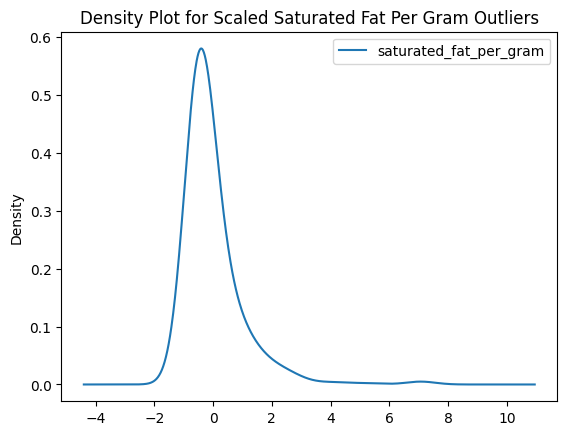

In [49]:
#Plots a smoothed down density curve of the saturated fat per gram scaled to further visualize the outliers in this column
scaled_sfpg.plot.kde(bw_method=0.5)
plt.title('Density Plot for Scaled Saturated Fat Per Gram Outliers')
plt.show()

As you can see from this analysis on the data set, most of the foods that were analyzed are on the lower end for saturated fat. However, there are 15 outliers on the higher end causing the data set to look skewed. There are clearly 0 outliers on the low end, but there are a few deep high end outliers. The printed values show this as well as the small bumps in the density plot.

## 6. Are there any missing values? If so, impute as necessary and explain your approach.

In [50]:
#Check if there are any null/missing values in the data set
print(nutrition_subset.isna().any())

food item                 False
weight_in_grams           False
saturated_fat             False
cholesterol               False
saturated_fat_per_gram    False
scaled_sfpg               False
dtype: bool


After double checking, there are no missing values in the data set. As I mentioned at the beginning, there was also no noise to clean.

## 7. Standardize (zero mean) the numeric variables, and determine if there are any outliers.

### a. Weight In Grams

In [51]:
#Scale and reshape the weight column
scaled_weight = pd.DataFrame(stdScaler.fit_transform(np.array(nutrition_subset['weight_in_grams'].values.reshape(-1,1))), columns=['weight_in_grams'])

nutrition_subset['scaled_weight'] = stdScaler.fit_transform(nutrition_subset[["weight_in_grams"]])

#Create a variable using the 3 sigma rule to find outliers
weight_outliers = nutrition_subset.query('(scaled_weight > 3) | (scaled_weight < -3)')

#print how many outliers are there:
print("number of outliers in weight in grams = ", len(weight_outliers))

number of outliers in weight in grams =  22


### b. Saturated Fat

In [52]:
#Scale and reshape the saturated fat column
scaled_satfat = pd.DataFrame(stdScaler.fit_transform(np.array(nutrition_subset['saturated_fat'].values.reshape(-1,1))), columns=['saturated_fat'])

nutrition_subset['scaled_satfat'] = stdScaler.fit_transform(nutrition_subset[["saturated_fat"]])

#Create a variable using the 3 sigma rule to find outliers
satfat_outliers = nutrition_subset.query('(scaled_satfat > 3) | (scaled_satfat < -3)')

#print how many outliers are there:
print("number of outliers in saturated fat = ", len(satfat_outliers))

number of outliers in saturated fat =  20


### c. Cholesterol

In [53]:
#Scale and reshape the cholesterol column
scaled_cholesterol = pd.DataFrame(stdScaler.fit_transform(np.array(nutrition_subset['cholesterol'].values.reshape(-1,1))), columns=['cholesterol'])

nutrition_subset['scaled_cholesterol'] = stdScaler.fit_transform(nutrition_subset[["cholesterol"]])

#Create a variable using the 3 sigma rule to find outliers
cholesterol_outliers = nutrition_subset.query('(scaled_cholesterol > 3) | (scaled_cholesterol < -3)')

#print how many outliers are there:
print("number of outliers in cholesterol = ", len(cholesterol_outliers))

number of outliers in cholesterol =  17


After standardizing all of the numeric values in this data set, I discovered that each column has a few outliers. All of these values have more outliers than the saturated fat per gram column (15) that I had previously analyzed.
- Weight has 22
- Saturated fat has 20
- Cholesterol has 17

## 8. Summarize your findings.
- I found that I did not need to impute or replace any values in this data set.
- Comparing foods of different sizes or weights can be innacurate because of the saturated fat per gram ratio.
- Food items like butter had the highest fat per gram, but were topped in overall saturated fats by  larger items like the pies.
- This data set had 0 low end outliers in the saturated fats per gram category because most of the food items in this set tend to be on the leaner side.
- The first quartile values and below for both cholesterol and saturated fats are all zeros.
- The data set as a whole had minimal outliers, with weight being the most at 22, and saturated fat per gram being the least at 15.

### Sources
- https://github.com/bforoura/IDS/blob/main/Portuguese_Bank_Python.ipynb
- https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv